<a href="https://colab.research.google.com/github/MinhNhata/BTVN_1_19146227_MinhNhat/blob/main/Temperature_Controller.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


23.511436788901577


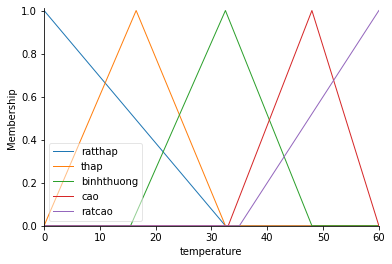

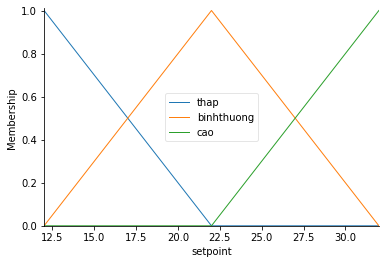

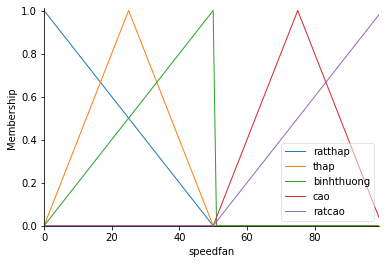

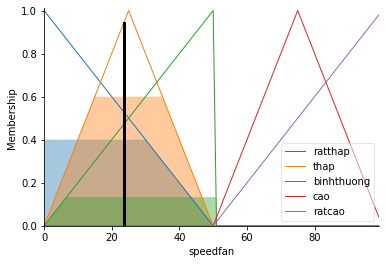

In [32]:
import numpy as np
import skfuzzy as fuzz 
from skfuzzy import control as ctrl 

temperature = ctrl.Antecedent(np.arange(0,60.5,0.5),'temperature')
setpoint = ctrl.Antecedent(np.arange(12,32.5,0.5),'setpoint')
speedfan = ctrl.Consequent(np.arange(0,100,1),'speedfan')


#nhietdo
temperature['ratthap']= fuzz.trimf(temperature.universe,[0,0,32.5]) 
temperature['thap']= fuzz.trimf(temperature.universe,[0,16.5,32.5])
temperature['binhthuong']= fuzz.trimf(temperature.universe,[15.5,32.5,48]) 
temperature['cao']= fuzz.trimf(temperature.universe,[33,48,60])
temperature['ratcao']= fuzz.trimf(temperature.universe,[35,60,60])

#mong_muon
setpoint['thap']= fuzz.trimf(setpoint.universe,[12,12,22])
setpoint['binhthuong']= fuzz.trimf(setpoint.universe,[12,22,32])
setpoint['cao']= fuzz.trimf(setpoint.universe,[22,32,32])
#tocdoquat
speedfan['ratthap']= fuzz.trimf(speedfan.universe,[0,0,50])
speedfan['thap']= fuzz.trimf(speedfan.universe,[0,25,50])
speedfan['binhthuong']= fuzz.trimf(speedfan.universe,[0,50,50]) 
speedfan['cao']= fuzz.trimf(speedfan.universe,[50,75,100])
speedfan['ratcao']= fuzz.trimf(speedfan.universe,[50,100,100])


temperature.view()
setpoint.view()
speedfan.view()


rule1 = ctrl.Rule(temperature['ratthap'] & setpoint['thap'],speedfan['thap'])
rule2 = ctrl.Rule(temperature['thap'] & setpoint['thap'],speedfan['ratthap'])
rule3 = ctrl.Rule(temperature['binhthuong'] & setpoint['thap'],speedfan['binhthuong'])
rule4 = ctrl.Rule(temperature['cao'] & setpoint['thap'],speedfan['cao'])
rule5 = ctrl.Rule(temperature['ratcao'] & setpoint['thap'],speedfan['ratcao'])

rule6 = ctrl.Rule(temperature['ratthap'] & setpoint['binhthuong'],speedfan['cao'])
rule7 = ctrl.Rule(temperature['thap'] & setpoint['binhthuong'],speedfan['binhthuong'])
rule8 = ctrl.Rule(temperature['binhthuong'] & setpoint['binhthuong'],speedfan['ratthap'])
rule9 = ctrl.Rule(temperature['cao'] & setpoint['binhthuong'],speedfan['binhthuong'])
rule10 = ctrl.Rule(temperature['ratcao'] & setpoint['binhthuong'],speedfan['cao'])

rule11 = ctrl.Rule(temperature['ratthap'] & setpoint['cao'],speedfan['ratthap'])
rule12 = ctrl.Rule(temperature['thap'] & setpoint['cao'],speedfan['ratthap'])
rule13 = ctrl.Rule(temperature['binhthuong'] & setpoint['cao'],speedfan['thap'])
rule14 = ctrl.Rule(temperature['cao'] & setpoint['cao'],speedfan['binhthuong'])
rule15 = ctrl.Rule(temperature['ratcao'] & setpoint['cao'],speedfan['ratthap'])

fan_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15])
fan= ctrl.ControlSystemSimulation(fan_ctrl)
fan.input['setpoint']=28
fan.input['temperature']=35
fan.compute()
print(fan.output['speedfan'])
speedfan.view(sim=fan)


